# Introduction to Data Mining Semester Project 

## 17011068 - Fatma Zehra Çetin 

## Geographical Original of Music

In this project, we work with the Geographical Original of Music Dataset which consists of 1059 samples and 70 attributes. From [dataset description,](https://archive.ics.uci.edu/ml/datasets/Geographical+Original+of+Music) we know that first 68 attributes are features of music and last 2 attributes are lattitude and longitude values of origin. We'll concatenate latitude and longitude values as class attribute. This dataset can be used for Classification and Regression tasks. 

First of all, we analyze the data then we apply classification and clustering algorithms to our dataset. Let's start with data analysis and see what we got. 

## a) Data Analysis

### Loading the Dataset

In [1]:
import pandas as pd

data = pd.read_csv("Geographical Original of Music/default_features_1059_tracks.txt", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


We have 70 attributes. From [dataset description,](https://archive.ics.uci.edu/ml/datasets/Geographical+Original+of+Music) we know that first 68 attributes are features of music and last 2 attributes are lattitude and longitude values of origin. Features of music attributes are float values.

### Data Info

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 70 columns):
0     1059 non-null float64
1     1059 non-null float64
2     1059 non-null float64
3     1059 non-null float64
4     1059 non-null float64
5     1059 non-null float64
6     1059 non-null float64
7     1059 non-null float64
8     1059 non-null float64
9     1059 non-null float64
10    1059 non-null float64
11    1059 non-null float64
12    1059 non-null float64
13    1059 non-null float64
14    1059 non-null float64
15    1059 non-null float64
16    1059 non-null float64
17    1059 non-null float64
18    1059 non-null float64
19    1059 non-null float64
20    1059 non-null float64
21    1059 non-null float64
22    1059 non-null float64
23    1059 non-null float64
24    1059 non-null float64
25    1059 non-null float64
26    1059 non-null float64
27    1059 non-null float64
28    1059 non-null float64
29    1059 non-null float64
30    1059 non-null float64
31    1059 non-null float

We got 1059 samples. Our attributes named with numbers and they have float values.

### Values per class (lattitude and longitude values)

We'll concatenate latitude and longitude values as class attribute. 

In [3]:
data["coords"] = data[68].astype(str) + " " + data[69].astype(str)

In [4]:
data["coords"].value_counts().count()

33

We got 33 different coordinates (33 different classes).

### Class distribution

Let's see a distribution of our 33 classes on samples.

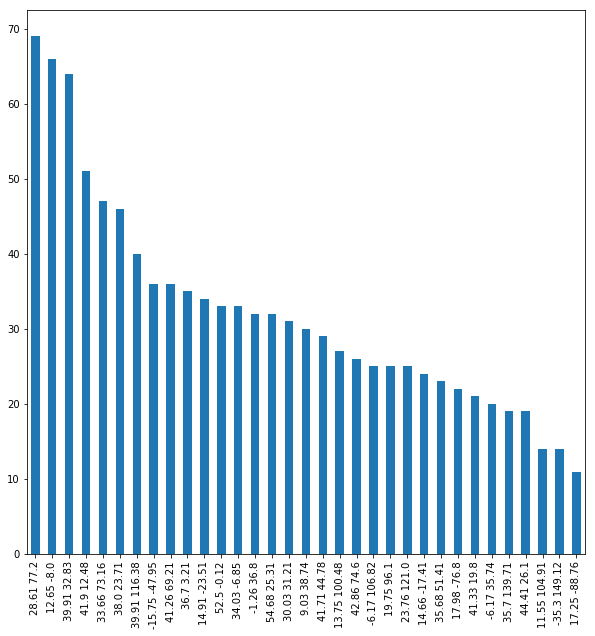

In [7]:
data["coords"].value_counts().plot(kind='bar', figsize=(10, 10))

It's intriguing to me that the third class (39.91 32.83) is the coordinate of Ankara :) I'm curious about which musics selected from Turkey :)

#### Class Distribution Histogram

With a histogram, we can see percentage of the distribution.

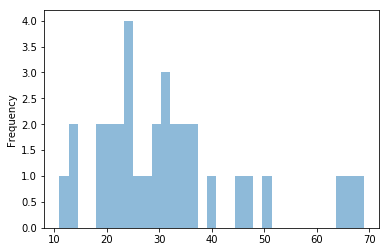

In [6]:
data["coords"].value_counts().plot.hist(bins=33, alpha=0.5)

Some classes 3, 4 times more frequent than the others on the dataset. We have a familiar problem that we called an 'Imbalanced Class Problem'. This will affect the classification and clustering results. Our classification models will learn better the frequent classes as to infrequent classes. 

### Null value check

In [8]:
data.isnull().values.any()

False

In [9]:
data.isnull().values.sum()

0

We don't have any null values in our dataset.

### Feature Importance

In [15]:
features_df = data[data.columns.difference([68, 69, "coords"])]
x = features_df.values
y = data["coords"].values

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier().fit(x, y)

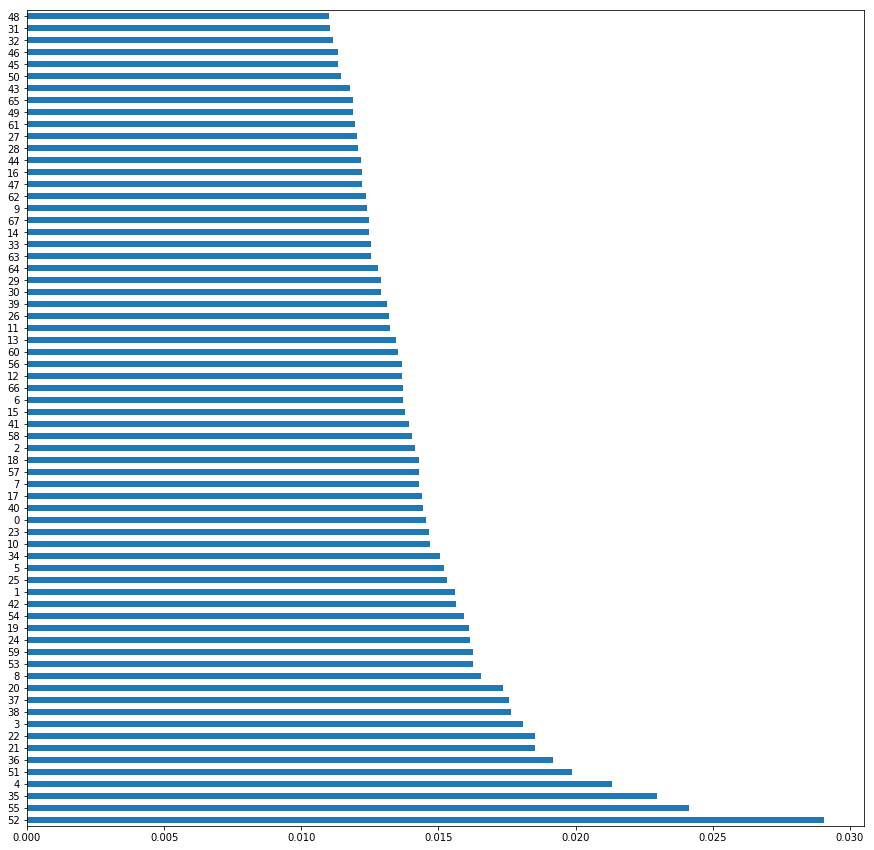

In [17]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(model.feature_importances_, index=features_df.columns)
feat_importances.nlargest(68).plot(kind='barh', figsize=(15, 15))
plt.show()

Features' importance plotted above. The importance of features means the effects of features on the class attributes. As we can see from the figure, the features' effects are not so different from each other. It changes between 0.012 and 0.025.

### Anomaly Detection with Isolation Forest

#### Boxplot Analysis

Let's see the outliers with Boxplot Analysis. 

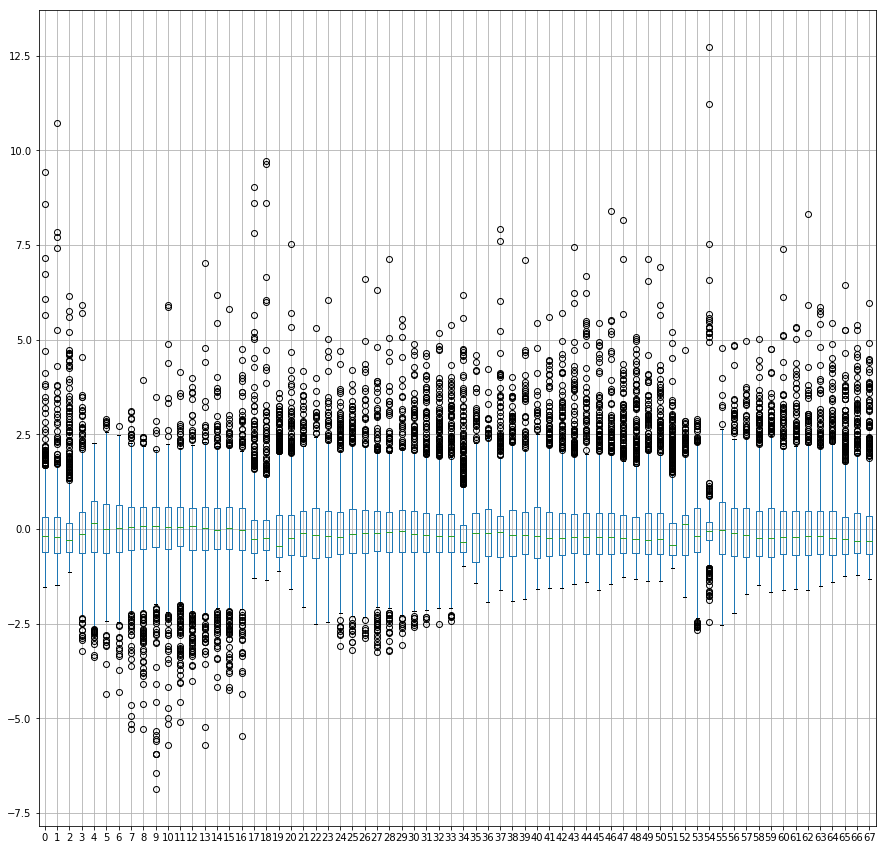

In [18]:
boxplot = features_df.boxplot(figsize=(15, 15))

We have 68 boxplots because we have 68 attributes. Points away from IQR ranges are outliers. We see a lot of outliers between (2.5, 12.5) and (-2.5, -7.5).  

#### Isolation Forest

In [19]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(x)

The contamination value is 0.1 which means 10% of data will mark as an outlier. We don't want to lose so much data as an outlier.

In [20]:
import numpy as np 

np.count_nonzero(yhat == -1)
mask = yhat != -1
X_rd, y_rd = x[mask, :], y[mask]

print(X_rd.shape, y_rd.shape)

(953, 68) (953,)


We applied the mask to the dataset. 106 samples eliminated and marked as an outlier.

In [21]:
unique, counts = np.unique(y_rd, return_counts=True)

print(np.asarray((unique, counts)).T, print(len(unique)))

33
[['-1.26 36.8' 27]
 ['-15.75 -47.95' 35]
 ['-35.3 149.12' 10]
 ['-6.17 106.82' 18]
 ['-6.17 35.74' 19]
 ['11.55 104.91' 12]
 ['12.65 -8.0' 60]
 ['13.75 100.48' 19]
 ['14.66 -17.41' 22]
 ['14.91 -23.51' 31]
 ['17.25 -88.76' 11]
 ['17.98 -76.8' 22]
 ['19.75 96.1' 13]
 ['23.76 121.0' 25]
 ['28.61 77.2' 65]
 ['30.03 31.21' 30]
 ['33.66 73.16' 46]
 ['34.03 -6.85' 32]
 ['35.68 51.41' 19]
 ['35.7 139.71' 14]
 ['36.7 3.21' 34]
 ['38.0 23.71' 46]
 ['39.91 116.38' 34]
 ['39.91 32.83' 60]
 ['41.26 69.21' 35]
 ['41.33 19.8' 21]
 ['41.71 44.78' 29]
 ['41.9 12.48' 49]
 ['42.86 74.6' 22]
 ['44.41 26.1' 18]
 ['52.5 -0.12' 25]
 ['54.68 25.31' 21]
 ['9.03 38.74' 29]] None


This operation is done for checking the classes on reduced data. We still have 33 classes. 

#### Boxplot Analysis on Reduced Data

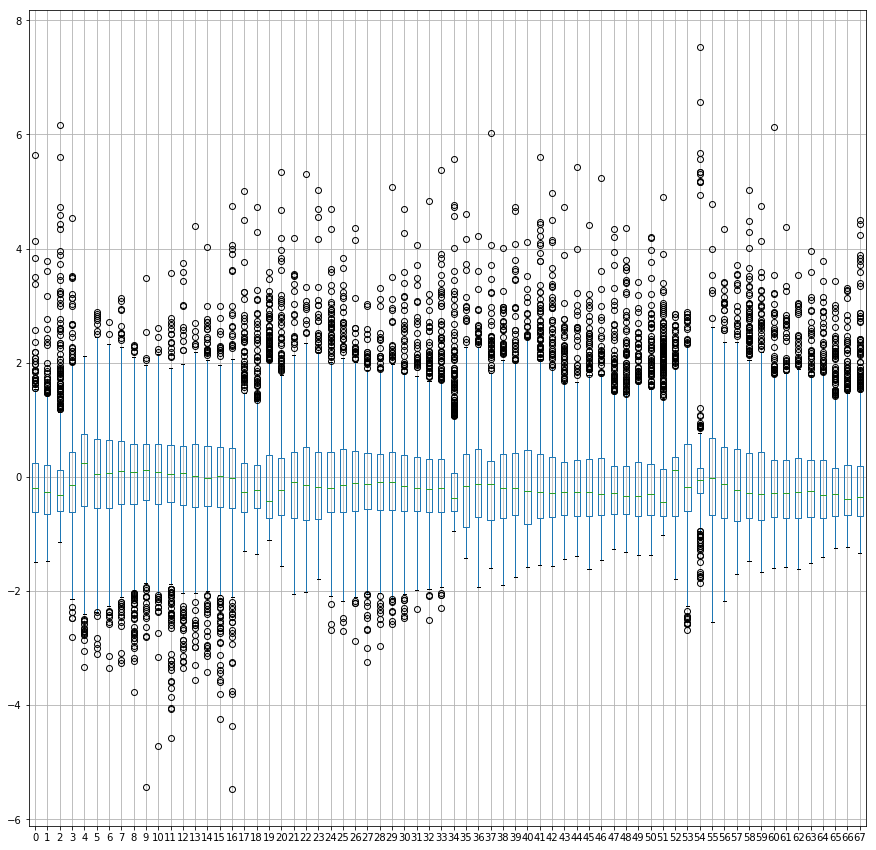

In [22]:
reducted_samples = pd.DataFrame(data=X_rd)
boxplot = reducted_samples.boxplot(figsize=(15, 15))

If we compare the previous boxplot analysis and this one, outliers between the (10, 5.0) and (-2.5, 7.0) range decrease dramatically.

### Train-Test Split

We split our dataset as train and test sets. For all classification tasks we use these sets.

#### Raw Data

In [23]:
from sklearn.model_selection import train_test_split

y = data[["coords"]]
X = data[data.columns.difference([68, 69, "coords"])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
print("X_train shape: {}, y_train shape: {}, X_test shape: {}, y_test shape:{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train shape: (847, 68), y_train shape: (847, 1), X_test shape: (212, 68), y_test shape:(212, 1)


#### Reduced Data

In [25]:
X_train_rd, X_test_rd, y_train_rd, y_test_rd = train_test_split(X_rd, y_rd, test_size=0.20, random_state=42)

In [26]:
print("Reduced X_train shape: {}, y_train shape: {}, X_test shape: {}, y_test shape:{}".format(X_train_rd.shape, y_train_rd.shape, X_test_rd.shape, y_test_rd.shape))

Reduced X_train shape: (762, 68), y_train shape: (762,), X_test shape: (191, 68), y_test shape:(191,)


## b) Classification

Since we got an imbalanced multi-class dataset, classic binary classifiers learn poorly our data. We need different approaches for this type of problem. One-vs-all and One-vs-one multi-class classification will be useful for our problem.

**One-vs-All (One-vs-Rest):** splits a multi-class classification into one binary classification problem per class.

**One-vs-One:** splits a multi-class classification into one binary classification problem per each pair of classes.

Let's assume that we have red, blue and green classes. 

If we train a **one-vs-all classifier** we will have three classification datasets like this:

**Binary Classification Problem 1:** red vs (blue, green)

**Binary Classification Problem 2:** blue vs (red, green)

**Binary Classification Problem 3:** green vs (red, blue)

If we train a **one-vs-one classifier** we will have 3 classification datasets like this:

**Binary Classification Problem 1:** red vs. blue

**Binary Classification Problem 2:** red vs. green

**Binary Classification Problem 4:** blue vs. green

We will apply classification algorithms on raw and reduced data. We can see the effects of outlier analysis in this way.

In [48]:
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from IPython.display import Image

In [28]:
import warnings
warnings.filterwarnings('always')

In [29]:
def plot_confusion_matris(model, X_test, y_test):
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(lr_clf, X_test, y_test, xticks_rotation='vertical', ax=ax)  

In [30]:
def confusion_matris_display(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(10, 10))
    labels = classification_report(y_test, y_pred, output_dict=True).keys()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp = disp.plot(ax=ax, xticks_rotation='vertical')

    plt.show()

### Logistic Regression with One-vs-rest

Logistic Regression designed as a binary classifier that uses the sigmoid function. But with the one-vs-rest parameter, we can use it in our problem. With a one-vs-rest parameter, we train N distinct logistic regression classifiers. N=33 in our case. Then, those N classifiers collectively used for multi-class classification.

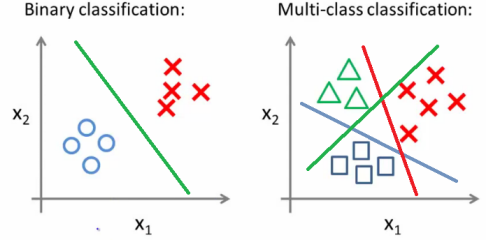

In [47]:
Image(filename = "one-vs-all.png", width = 500, height = 300)

In [31]:
def logistic_regression(X_train, y_train, X_test, y_test):
    lr_clf = LogisticRegression(random_state=1, multi_class='ovr').fit(X_train, y_train)
    y_pred = lr_clf.predict(X_test)
    
    print(classification_report(y_test, y_pred)) 
    return y_pred

#### Raw Data (without outlier analysis)

In [32]:
y_pred_lr = logistic_regression(X_train, y_train.values.ravel(), X_test, y_test.values.ravel())

               precision    recall  f1-score   support

   -1.26 36.8       0.50      0.75      0.60         4
-15.75 -47.95       0.31      0.67      0.42         6
 -35.3 149.12       1.00      0.50      0.67         4
 -6.17 106.82       0.00      0.00      0.00         4
  -6.17 35.74       0.25      0.25      0.25         4
 11.55 104.91       1.00      1.00      1.00         1
   12.65 -8.0       0.36      0.50      0.42        10
 13.75 100.48       0.00      0.00      0.00         3
 14.66 -17.41       0.50      0.25      0.33         4
 14.91 -23.51       0.12      0.20      0.15         5
 17.25 -88.76       1.00      0.50      0.67         2
  17.98 -76.8       0.71      0.83      0.77         6
   19.75 96.1       0.00      0.00      0.00         1
  23.76 121.0       0.83      1.00      0.91         5
   28.61 77.2       0.20      0.21      0.21        14
  30.03 31.21       0.00      0.00      0.00        10
  33.66 73.16       0.71      0.33      0.45        15
  34.03 -

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Some classes could not predicted from model such as 35.68 51.41, 35.7 139.71, 36.7 3.21. Their precision, recall and f1-score values are 0. Their TP = 0. Most successfull classes are 23.76 121.0, 41.71 44.78, 54.68 25.31 with 0.91, 0.89 and 0.92 f1-scores respectively. 


Classes's support values gives how many sample we have for that class. With respect to this value we can calculate weighted precision, recall and f-1 score. 11.55 104.91 class's f-1 score is 1.00. It looks very succesfull but when we look at the support value it's support is 1. So it has only 1 sample and classified correctly. This class must has a less weight when we calculate the avg f-1 score. If we had more sample f-1 score could be less than 1.

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


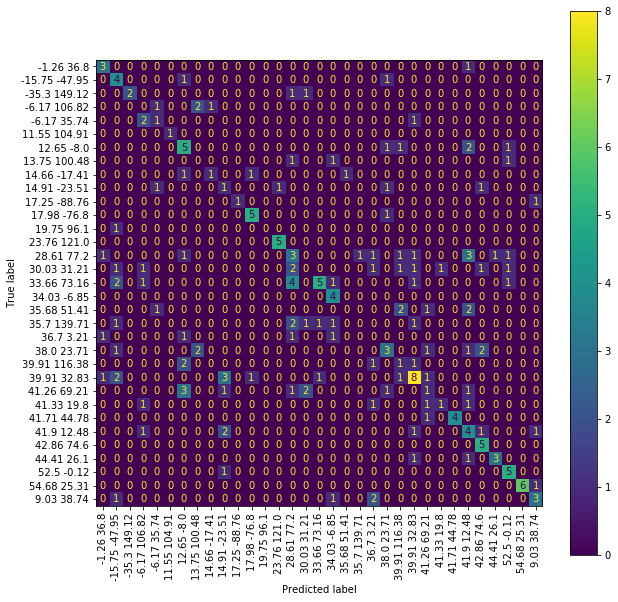

In [33]:
confusion_matris_display(y_test.values.ravel(), y_pred_lr)

From the class confusion matrix, we can see actual classes and confused classes. 33.66 73.16 class confused with 28.61 77.2 mostly. Matrix is sparse and most values outside of the diagonal of the matrix. 

#### Reduced Data (Outlier analysis applied)

In [35]:
y_pred_lr_rd = logistic_regression(X_train_rd, y_train_rd, X_test_rd, y_test_rd)

               precision    recall  f1-score   support

   -1.26 36.8       0.50      0.50      0.50         4
-15.75 -47.95       0.40      0.29      0.33         7
 -35.3 149.12       0.00      0.00      0.00         1
 -6.17 106.82       0.00      0.00      0.00         3
  -6.17 35.74       0.33      0.25      0.29         4
 11.55 104.91       0.00      0.00      0.00         1
   12.65 -8.0       0.58      0.58      0.58        12
 13.75 100.48       0.14      0.14      0.14         7
 14.66 -17.41       0.00      0.00      0.00         2
 14.91 -23.51       0.00      0.00      0.00         5
 17.25 -88.76       0.50      1.00      0.67         1
  17.98 -76.8       0.50      0.33      0.40         3
   19.75 96.1       0.50      0.50      0.50         2
  23.76 121.0       1.00      1.00      1.00         3
   28.61 77.2       0.53      0.53      0.53        15
  30.03 31.21       0.00      0.00      0.00         3
  33.66 73.16       0.14      0.22      0.17         9
  34.03 -

Accuracy did not improve with reduced data. The number of classes that were completely wrongly predicted increased from 6 to 8. Acurracy, precision, recall and f1-score dropped nearly 5%. 

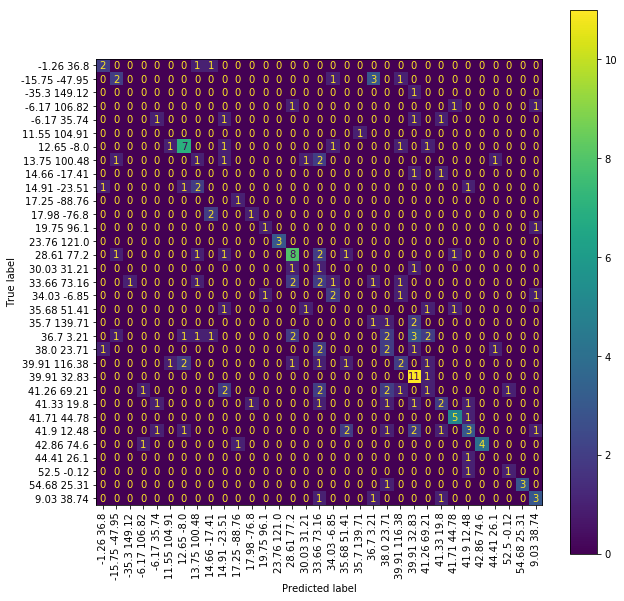

In [36]:
confusion_matris_display(y_test_rd, y_pred_lr_rd)

We have less value outside of the diagonal of matrix. It means we have less wrong predicted data. Because of the reduced number of data every wrong prediction has more value and accuracy did not improve. Classes with 0.00 F1 scores increased in this case. 

39.91 32.83 class predicted really well. It has 11 samples and 9 of them classified correctly. 54.68 25.31 is another successful class with 5 of 5 samples true predicted.

### One-vs-One Classifier with SVM

**What is SVM?**

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. A support vector machine takes data points and outputs the hyperplane (which in two dimensions it’s simply a line) that best separates the tags. This line is the decision boundary. But, what exactly is the best hyperplane? For SVM, it’s the one that maximizes the margins from both tags. In other words: the hyperplane (remember it's a line in this case) whose distance to the nearest element of each tag is the largest.

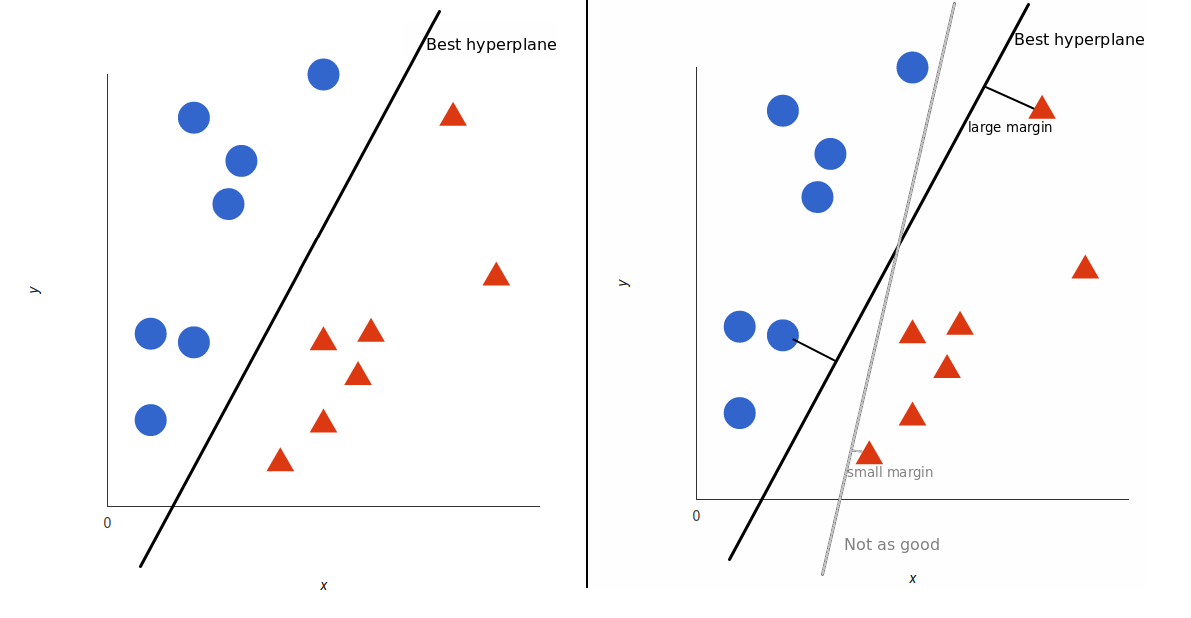

In [49]:
Image(filename = "svm.png", width = 800, height = 800)

The good thing about SVM is, it can work with non-linear data.

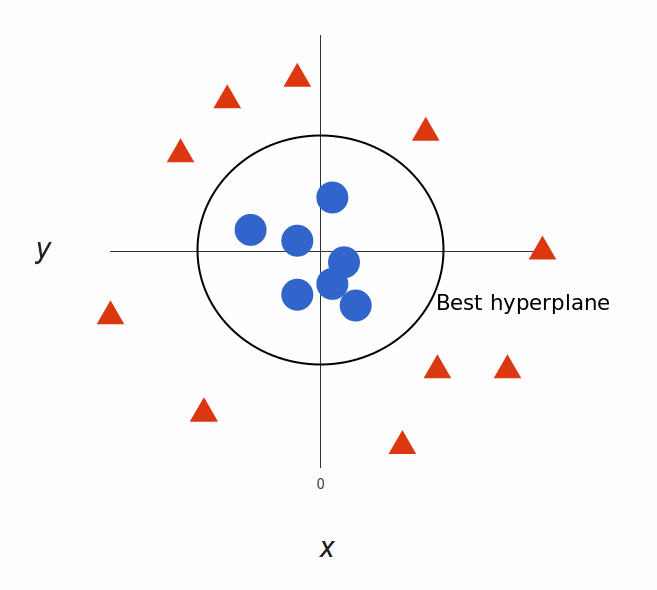

In [51]:
Image(filename = "non-linear.png", width = 400, height = 400)

With one-vs-one classifier we will train multiple classifiers with svm and we can use this binary classifier in our problem.

In [272]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

def one_vs_one(X_train, y_train, X_test, y_test):
    ovo = OneVsOneClassifier(SVC(gamma='auto')).fit(X_train, y_train)
    y_pred = ovo.predict(X_test)

    print(classification_report(y_test, y_pred))
    return y_pred

#### Raw Data (without outlier analysis)

In [273]:
y_pred_ovo = one_vs_one(X_train, y_train.values.ravel(), X_test, y_test.values.ravel())

               precision    recall  f1-score   support

   -1.26 36.8       0.60      0.75      0.67         4
-15.75 -47.95       0.21      0.50      0.30         6
 -35.3 149.12       1.00      0.25      0.40         4
 -6.17 106.82       0.00      0.00      0.00         4
  -6.17 35.74       0.50      0.25      0.33         4
 11.55 104.91       1.00      1.00      1.00         1
   12.65 -8.0       0.37      0.70      0.48        10
 13.75 100.48       0.00      0.00      0.00         3
 14.66 -17.41       0.67      0.50      0.57         4
 14.91 -23.51       0.00      0.00      0.00         5
 17.25 -88.76       1.00      0.50      0.67         2
  17.98 -76.8       0.71      0.83      0.77         6
   19.75 96.1       0.00      0.00      0.00         1
  23.76 121.0       0.83      1.00      0.91         5
   28.61 77.2       0.19      0.36      0.25        14
  30.03 31.21       0.00      0.00      0.00        10
  33.66 73.16       0.80      0.27      0.40        15
  34.03 -

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM has almost the same accuracy as Logistic Regression. They both have nearly 40% accuracy. The difference between SVM is its Precision is better than Logistic Regression. LR's weighted precision is 0.41, SVM's weighted precision is 0.45. We can say that SVM is better at selecting relevant elements. 

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


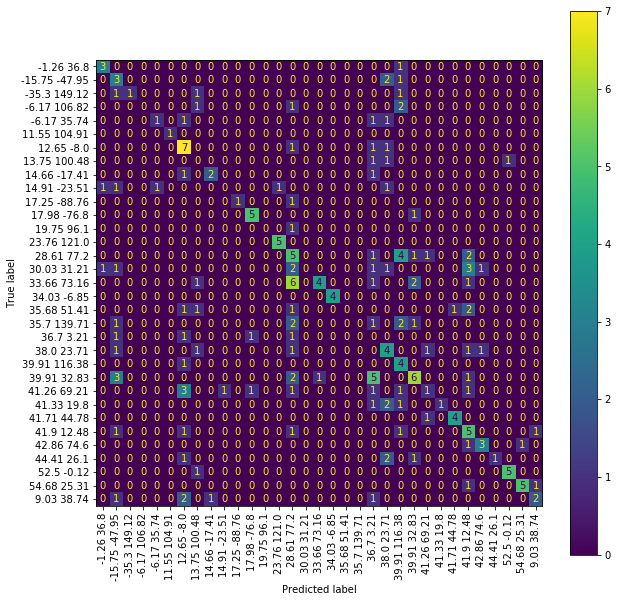

In [274]:
confusion_matris_display(y_test, y_pred_ovo)

In the confusion matrix, a lot of values outside of the diagonal of the matrix. 33.66 73.6 class is confused with 28.61 77.2 pretty much. 6 of the 15 samples wrongly predicted as 28.61 77.2 and 4 of the 15 samples truly predicted as 33.66 73.6.

#### Reduced Data (Outlier analysis applied)

In [275]:
y_pred_ovo_rd = one_vs_one(X_train_rd, y_train_rd, X_test_rd, y_test_rd)

               precision    recall  f1-score   support

   -1.26 36.8       0.80      0.67      0.73         6
-15.75 -47.95       0.33      0.57      0.42         7
 -35.3 149.12       0.00      0.00      0.00         1
 -6.17 106.82       0.00      0.00      0.00         2
  -6.17 35.74       1.00      0.40      0.57         5
 11.55 104.91       1.00      0.33      0.50         3
   12.65 -8.0       0.29      0.60      0.39        10
 13.75 100.48       0.00      0.00      0.00         7
 14.66 -17.41       1.00      0.25      0.40         4
 14.91 -23.51       0.00      0.00      0.00         6
  17.98 -76.8       0.67      0.80      0.73         5
   19.75 96.1       0.00      0.00      0.00         0
  23.76 121.0       0.75      1.00      0.86         3
   28.61 77.2       0.28      0.60      0.38        15
  30.03 31.21       0.00      0.00      0.00         3
  33.66 73.16       0.23      0.33      0.27         9
  34.03 -6.85       0.67      0.40      0.50         5
  35.68 5

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\

SVM's reduced data has almost the same accuracy with SVM's raw data. If we compare reduced data of LR and SVM, SVM has nearly 5% better accuracy, precision and recall. 

Like LR's reduced data we have more TP = 0 elements in this result.

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\

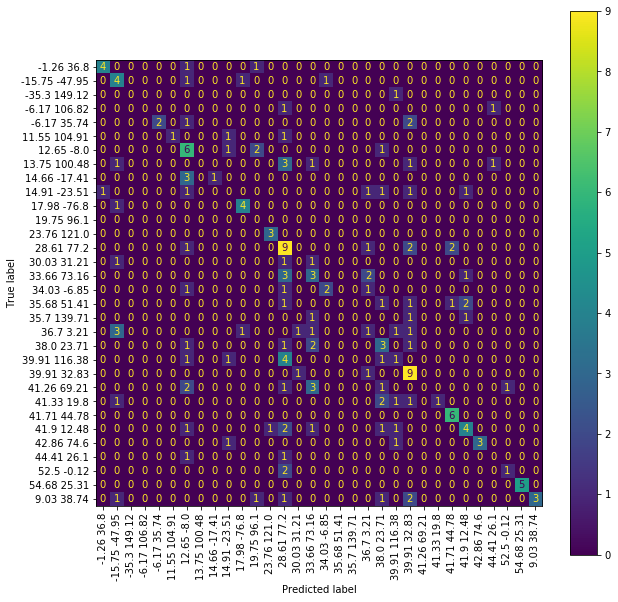

In [276]:
confusion_matris_display(y_test_rd, y_pred_ovo_rd)

A lot of value is outside of the diagonal of the matrix. 28.61 77.2 has 21 values as False Positive. It has only 15 samples. Because of the imbalanced class problem, this class is overgeneralized by the model. This situation occurs with other classes with a higher number of samples such as 39.91 32.83, 12.65 -8.0.

### Decision Tree

We learned this classifier in the lecture. Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. In class we use entropy and informatin gain to construct decision tree.

In [277]:
from sklearn import tree

def decision_tree(X_train, y_train, X_test, y_test):
    dtree = tree.DecisionTreeClassifier().fit(X_train, y_train)
    y_pred = dtree.predict(X_test)

    print(classification_report(y_test, y_pred))
    return y_pred

#### Raw Data (without outlier analysis)

In [278]:
y_pred_dtree = decision_tree(X_train, y_train.values.ravel(), X_test, y_test.values.ravel())

               precision    recall  f1-score   support

   -1.26 36.8       0.22      0.50      0.31         4
-15.75 -47.95       0.11      0.17      0.13         6
 -35.3 149.12       0.40      0.50      0.44         4
 -6.17 106.82       0.00      0.00      0.00         4
  -6.17 35.74       0.50      0.25      0.33         4
 11.55 104.91       0.33      1.00      0.50         1
   12.65 -8.0       0.46      0.60      0.52        10
 13.75 100.48       0.00      0.00      0.00         3
 14.66 -17.41       0.17      0.25      0.20         4
 14.91 -23.51       0.00      0.00      0.00         5
 17.25 -88.76       0.00      0.00      0.00         2
  17.98 -76.8       0.60      0.50      0.55         6
   19.75 96.1       0.00      0.00      0.00         1
  23.76 121.0       0.50      0.40      0.44         5
   28.61 77.2       0.14      0.21      0.17        14
  30.03 31.21       0.00      0.00      0.00        10
  33.66 73.16       0.38      0.20      0.26        15
  34.03 -

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision tree has much lower accuracy when we compare with SVM and LR. Accuracy dropped nearly 14%. Classes with TP=0 almost doubled. Most succesfull classes are 54.68 25.31 and 41.71 44.78 with 75% and 80% f1-score respectively. 54.68 25.31 has high f1-score in every model we tried. 

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


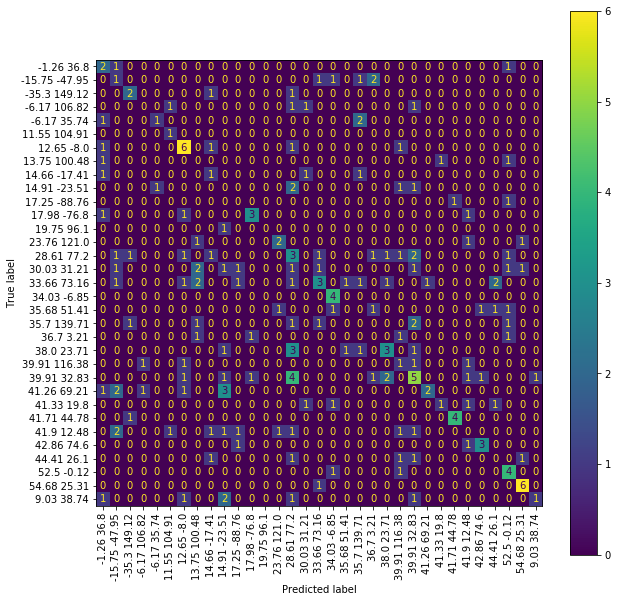

In [279]:
confusion_matris_display(y_test, y_pred_dtree)

A lot of confusions made :) 39.91 32.83, 39.91 116.38, 28.61 77.2 confused a lot. These classes have many False Positive values as we can see. 

#### Reduced Data (Outlier analysis applied)

In [280]:
y_pred_dtree_rd = decision_tree(X_train_rd, y_train_rd, X_test_rd, y_test_rd)

               precision    recall  f1-score   support

   -1.26 36.8       0.18      0.33      0.24         6
-15.75 -47.95       0.17      0.14      0.15         7
 -35.3 149.12       0.00      0.00      0.00         1
 -6.17 106.82       0.00      0.00      0.00         2
  -6.17 35.74       0.67      0.40      0.50         5
 11.55 104.91       0.67      0.67      0.67         3
   12.65 -8.0       0.31      0.40      0.35        10
 13.75 100.48       0.00      0.00      0.00         7
 14.66 -17.41       0.00      0.00      0.00         4
 14.91 -23.51       0.00      0.00      0.00         6
  17.98 -76.8       0.60      0.60      0.60         5
   19.75 96.1       0.00      0.00      0.00         0
  23.76 121.0       0.40      0.67      0.50         3
   28.61 77.2       0.07      0.07      0.07        15
  30.03 31.21       0.00      0.00      0.00         3
  33.66 73.16       0.00      0.00      0.00         9
  34.03 -6.85       0.14      0.20      0.17         5
  35.68 5

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\

With reduced data Decision Tree's accuracy almost did not changed. The difference is between 1-2%. The only class with f1-score higher than 70% is 41.71 44.78. 

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\

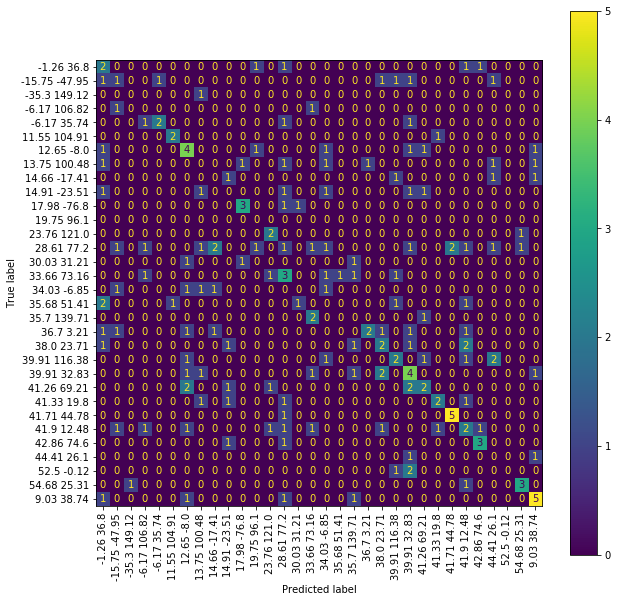

In [281]:
confusion_matris_display(y_test_rd, y_pred_dtree_rd)

### Results

#### Raw Data Classification Results

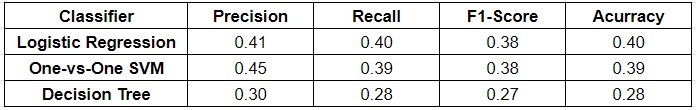

In [53]:
Image(filename = "raw_data_classification.JPG", width = 600, height = 600)

#### Reduced Data Classification Results

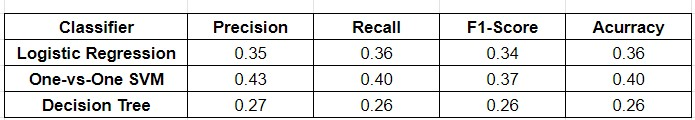

In [54]:
Image(filename = "reduced_data_classification.JPG", width = 600, height = 600)

If we compare the results of raw and reduced data we can see there is not much difference between them. Logistic Regression and Decision Tree works better with raw data. One-vs-One SVM works slightly better with reduced data. Removing outliers is not an effective way to improve the accuracy of classification in our case.

One-vs-All and One-vs-One approaches have a great impact on classification results. Logistic Regression with One-vs-Rest and SVM with One-vs-One has nearly 12% better accuracy than Decision Tree on a multi-class problem.

When we look at the confusion matrices most distinct classes are 54.68 25.31, -1.26 36.8, 41.71 44.78, 42.86 74.6, 23.76 121.0, 17.98 -76.8. Their FP value is low. If we look at their locations are Lithuania, Kenya, Georgia, Kyrgyzstan, Taiwan, and Jamaica respectively. These classes has low number of samples and did not overgeneralized.

The most confused classes by classification algorithms are 39.91 32.83, 12.65 -8.0, 28.61 77.2. They have lots of False Positive values. Their locations are Turkey, Algeria, and India. They are the most frequent classes in our dataset. Because of that, they overgeneralized.

In this dataset, we have a lot of classes and they distributed imbalanced. Because of these two things, accuracy and the f-1 score did not improve much.

## c) Clustering

### Dataset

For clustering, we won't split the data as train and test. 

#### Raw Data

In [71]:
X = data[data.columns.difference([68, 69, "coords"])]
y = data[["coords"]]
print(X.shape, y.shape)

(1059, 68) (1059, 1)


#### Reduced Data

In [72]:
print(X_rd.shape, y_rd.shape)

(953, 68) (953,)


### Purity Calculation for Measuring Clustering Success

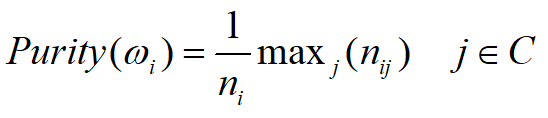

In [452]:
Image(filename = "purity_formula.png", width = 400, height = 400)

Purity the ratio between the dominant class in the cluster πi and the size of cluster ωi. We will use this metric when we try to label the clusters with actual classes. 

The problem is, more than one cluster could have the same dominant class. We don't want to lose some of our classes. We will compare the clusters which have the same dominant class. We'll label the cluster which has the maximum number of that class samples. 

After this step, for the clusters which did not label we'll look at the dominant class that did not be assigned to another cluster. We will do these steps recursively until all clusters have their class.

**If all distinct classes of a cluster assigned to other clusters?**

Sometimes, all distinct classes of a cluster can be assigned to other clusters because they have more class samples. Actually, I could not find a proper solution to solve this problem and I assigned the dominant class to cluster without a label.  After that, we have 2 clusters with the same class label. So, if we have this kind of problem some classes will not represent by the clusters.

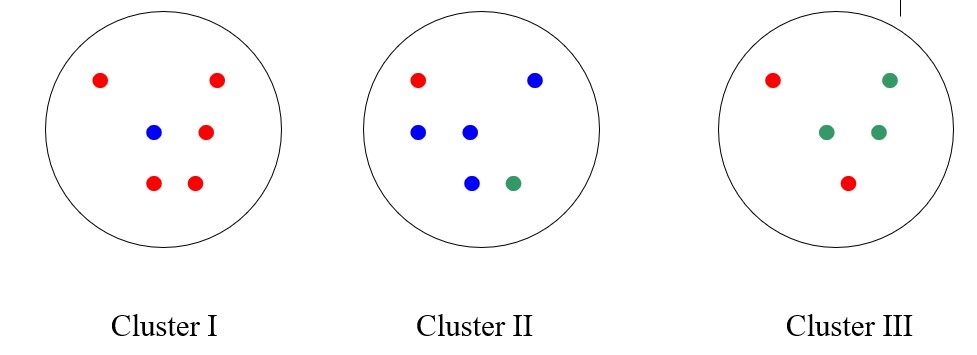

In [450]:
Image(filename = "purity.JPG", width = 600, height = 600)

In this function, we will count all clusters' class samples and put their sum into clusters x classes matrix.

In [422]:
def purity(X, y, y_labels):
    clusters = []
    for i in range(33):
        clusters.append(y[y_labels == i])
    actual_labels = np.unique(y)
    purities = np.zeros((len(clusters), len(actual_labels)))
    
    for i in range(len(clusters)):
        unique, counts = np.unique(clusters[i], return_counts=True)
        for j in range(len(unique)):
            purities[i][np.where(actual_labels == unique[j])[0]] = counts[j]
    
    return purities

If one class is dominant on only one cluster we assign that class to the cluster.

In [370]:
def one_class_one_cluster(clusters_max_purity_indices, total_dominant_classes, cluster_classes, actual_labels, labels_dir):
    
    for i in range(len(clusters_max_purity_indices)):
        for j in range(len(total_dominant_classes)):
            
            # bu class sadece 1 kümede mi dominant
            if clusters_max_purity_indices[i] != -1 and clusters_max_purity_indices[i] == total_dominant_classes[j][0] and total_dominant_classes[j][1] == 1: 
                cluster_classes[i] = clusters_max_purity_indices[i]
                labels_dir[actual_labels[clusters_max_purity_indices[i]]] = 1
    return cluster_classes, labels_dir

If more than one clusters have the same class we assign that class to the cluster that has a maximum number of that class samples.

In [371]:
def overlapping_classes(max_purity_index, dominant_classes, purities, cluster_classes, actual_labels, labels_dir):
    for i in range (len(dominant_classes)):
        if dominant_classes[i][1] > 1 and dominant_classes[i][0] != -1: # 1'den fazla sınıfta baskın ise
            indices = np.where(max_purity_index == dominant_classes[i][0]) # hangi kümelerde en baskın 

            max_purity = -1
            max_index = 0
            for j in range(len(indices[0])):
                cluster_index = indices[0][j]
                dominant_class_index = dominant_classes[i][0]
                cluster_purity = purities[cluster_index][dominant_class_index]

                if  cluster_purity > max_purity:
                    max_purity = cluster_purity
                    max_index = cluster_index

            cluster_classes[max_index] = dominant_classes[i][0]
            labels_dir[actual_labels[dominant_classes[i][0]]] = 1
    return cluster_classes, labels_dir

Until all clusters' have their classes we apply these functions recursively.

In [449]:
def assign_classes(cluster_classes, purities, labels_dir, actual_labels):
    max_purities_indices = np.full((33), -1)
    for i in range(len(cluster_classes)):
        if cluster_classes[i] is None: # eğer cluster'ın sınıfı hala atanamadıysa
            max_ = 0
            max_index = -1
            for j in range(len(purities[i])):
                if j not in cluster_classes and purities[i][j] > max_:
                    max_ = purities[i][j]
                    max_index = j
                               
            max_purities_indices[i] = max_index 
            if max_index == -1:
                try:
                    max_index = np.where(max(purities[i]))[0][0]
                    cluster_classes[i] = max_index
                except:
                    cluster_classes[i] = -1
    unique, counts = np.unique(max_purities_indices,  return_counts=True)
    dominant_classes = np.asarray((unique, counts)).T
    if None in cluster_classes:

        cluster_classes, labels_dir = one_class_one_cluster(max_purities_indices, dominant_classes, cluster_classes, 
                                                            actual_labels, labels_dir)
        
        cluster_classes, labels_dir = overlapping_classes(max_purities_indices, dominant_classes, purities, cluster_classes, 
                                                          actual_labels, labels_dir)
    if None not in cluster_classes:
        return cluster_classes
    
    return assign_classes(cluster_classes, purities, labels_dir, actual_labels)

In [454]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [456]:
def clustering(X, y, model):
    y_labels = model.labels_
    
    purities = purity(X, y, y_labels)
    actual_labels = np.unique(y)
    labels_dir = dict.fromkeys(actual_labels, 0)
    cluster_classes = np.empty(33, dtype=object)
    
    cluster_classes = assign_classes(cluster_classes, purities, labels_dir, actual_labels)
    print("Unique classes: ", len(np.unique(cluster_classes)))
    
    y_real_labels = np.empty(len(y_labels), dtype=object)
    for j in range(len(y_labels)):
        y_real_labels[j] = actual_labels[cluster_classes[y_labels[j]]]
        
    print(classification_report(y, y_real_labels))

### K-Means

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

In [412]:
from sklearn.cluster import KMeans

#### Raw data

In [457]:
kmeans = KMeans(n_clusters=33, random_state=0).fit(X)
clustering(X, y.values.ravel(), kmeans)

Unique classes:  32
               precision    recall  f1-score   support

   -1.26 36.8       0.11      0.31      0.16        32
-15.75 -47.95       0.14      0.03      0.05        36
 -35.3 149.12       0.50      0.43      0.46        14
 -6.17 106.82       0.13      0.16      0.15        25
  -6.17 35.74       0.07      0.20      0.11        20
 11.55 104.91       0.09      0.29      0.13        14
   12.65 -8.0       0.48      0.35      0.40        66
 13.75 100.48       0.28      0.19      0.22        27
 14.66 -17.41       0.10      0.08      0.09        24
 14.91 -23.51       0.15      0.12      0.13        34
 17.25 -88.76       0.17      0.73      0.28        11
  17.98 -76.8       0.34      0.64      0.44        22
   19.75 96.1       0.54      0.52      0.53        25
  23.76 121.0       0.67      0.64      0.65        25
   28.61 77.2       0.41      0.19      0.26        69
  30.03 31.21       0.09      0.03      0.05        31
  33.66 73.16       0.12      0.06      0.08

<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sa

We have 32 unique classes, it means 1 class (39.91 32.83) does not represented by our clusters. 39.91 32.83 has 64 samples. Not representing this class affects accuracy a lot.

Accuracy and f1-score values are pretty low. If we do not try to represent as much class as we can the accuracy would be higher.

#### Reduced Data

In [458]:
kmeans = KMeans(n_clusters=33, random_state=0).fit(X_rd)
clustering(X_rd, y_rd, kmeans)

Unique classes:  30
               precision    recall  f1-score   support

   -1.26 36.8       0.09      0.33      0.14        27
-15.75 -47.95       0.13      0.14      0.14        35
 -35.3 149.12       0.08      0.20      0.11        10
 -6.17 106.82       0.12      0.22      0.15        18
  -6.17 35.74       0.00      0.00      0.00        19
 11.55 104.91       0.00      0.00      0.00        12
   12.65 -8.0       0.74      0.47      0.57        60
 13.75 100.48       0.23      0.32      0.27        19
 14.66 -17.41       0.14      0.14      0.14        22
 14.91 -23.51       0.03      0.03      0.03        31
 17.25 -88.76       0.00      0.00      0.00        11
  17.98 -76.8       0.41      0.59      0.48        22
   19.75 96.1       0.13      0.31      0.18        13
  23.76 121.0       0.89      0.68      0.77        25
   28.61 77.2       0.44      0.23      0.30        65
  30.03 31.21       0.10      0.10      0.10        30
  33.66 73.16       0.20      0.07      0.10

<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in lab

We have 30 unique classes, -6.17 35.74 and 11.55 104.91 classes not represented. Accuracy and f1-score improved when we compare to the raw data. The most succesfull classes are 23.76 121.0 and 54.68 25.31 with 0.77 and 0.74 f1-scores respectively.

### Ward's Agglomerative Clustering

There are four methods for combining clusters in agglomerative approach. The one we choose to use is called Ward’s Method. Unlike the others. Instead of measuring the distance directly, it analyzes the variance of clusters. Ward’s is said to be the most suitable method for quantitative variables.

Ward’s method says that the distance between two clusters, A and B, is how much the sum of squares will increase when we merge them. 

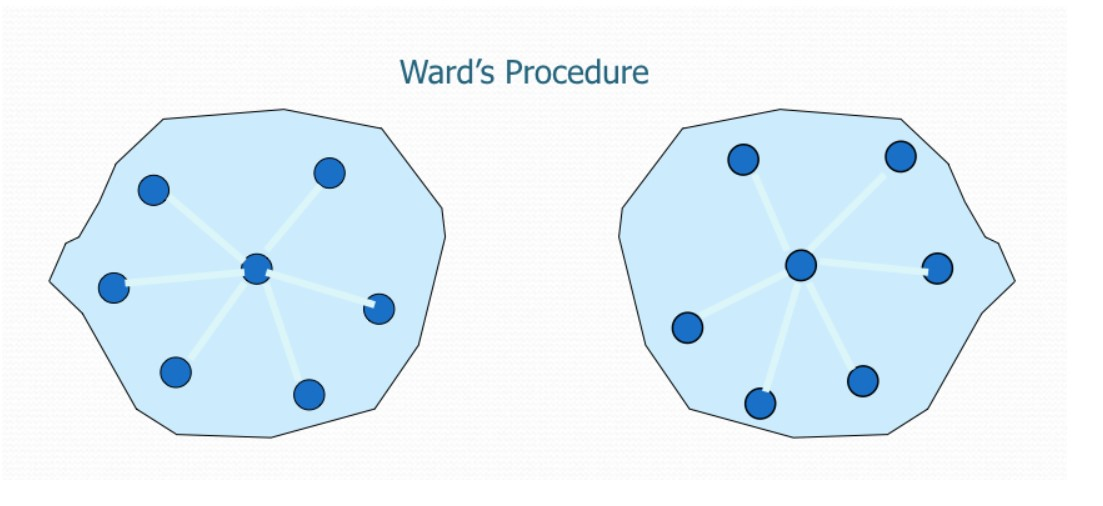

In [465]:
Image(filename = "ward.JPG", width = 600, height = 600)

#### Raw data

In [459]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=33, linkage='ward').fit(X)
clustering(X, y.values.ravel(), agglomerative)

Unique classes:  32
               precision    recall  f1-score   support

   -1.26 36.8       0.22      0.16      0.18        32
-15.75 -47.95       0.17      0.03      0.05        36
 -35.3 149.12       0.56      0.36      0.43        14
 -6.17 106.82       0.67      0.08      0.14        25
  -6.17 35.74       0.18      0.45      0.25        20
 11.55 104.91       0.40      0.29      0.33        14
   12.65 -8.0       0.58      0.45      0.51        66
 13.75 100.48       0.21      0.22      0.22        27
 14.66 -17.41       0.10      0.08      0.09        24
 14.91 -23.51       0.30      0.09      0.14        34
 17.25 -88.76       0.20      0.36      0.26        11
  17.98 -76.8       0.23      0.86      0.37        22
   19.75 96.1       0.68      0.52      0.59        25
  23.76 121.0       0.55      0.68      0.61        25
   28.61 77.2       0.27      0.28      0.27        69
  30.03 31.21       0.09      0.10      0.10        31
  33.66 73.16       0.04      0.02      0.03

<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sa

44.41 26.1 with 19 samples could not respresented by our clusters. F1 score and accuracy slightly better than K-means. 

#### Reduced Data

In [460]:
agglomerative = AgglomerativeClustering(n_clusters=33, linkage='ward').fit(X_rd)
clustering(X_rd, y_rd, agglomerative)

Unique classes:  30
               precision    recall  f1-score   support

   -1.26 36.8       0.14      0.37      0.21        27
-15.75 -47.95       0.17      0.17      0.17        35
 -35.3 149.12       0.60      0.60      0.60        10
 -6.17 106.82       0.18      0.17      0.17        18
  -6.17 35.74       0.15      0.26      0.19        19
 11.55 104.91       0.15      0.50      0.23        12
   12.65 -8.0       0.59      0.28      0.38        60
 13.75 100.48       0.20      0.21      0.21        19
 14.66 -17.41       0.06      0.14      0.08        22
 14.91 -23.51       0.05      0.03      0.04        31
 17.25 -88.76       0.33      0.91      0.49        11
  17.98 -76.8       0.55      0.55      0.55        22
   19.75 96.1       0.55      0.46      0.50        13
  23.76 121.0       0.94      0.68      0.79        25
   28.61 77.2       0.36      0.23      0.28        65
  30.03 31.21       0.13      0.17      0.14        30
  33.66 73.16       0.17      0.17      0.17

<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in lab

This is the best clustering scenario for our dataset (Ward's Method with reduced data). 3 classes could not represented by clusters. 

### Complete Linkage Hierarchical Clustering

It computes all pairwise dissimilarities between the elements in cluster 1 and the elements in cluster 2, and considers the largest value (i.e., maximum value) of these dissimilarities as the distance between the two clusters. It tends to produce more compact clusters.

#### Raw data

In [461]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=33, linkage='complete').fit(X)
clustering(X, y.values.ravel(), agglomerative)

Unique classes:  26
               precision    recall  f1-score   support

   -1.26 36.8       0.12      0.09      0.11        32
-15.75 -47.95       0.33      0.03      0.05        36
 -35.3 149.12       0.11      0.29      0.16        14
 -6.17 106.82       0.67      0.08      0.14        25
  -6.17 35.74       0.00      0.00      0.00        20
 11.55 104.91       0.80      0.29      0.42        14
   12.65 -8.0       0.10      0.68      0.18        66
 13.75 100.48       0.21      0.26      0.23        27
 14.66 -17.41       1.00      0.04      0.08        24
 14.91 -23.51       1.00      0.03      0.06        34
 17.25 -88.76       0.21      0.91      0.34        11
  17.98 -76.8       0.19      0.82      0.31        22
   19.75 96.1       0.13      0.32      0.19        25
  23.76 121.0       0.00      0.00      0.00        25
   28.61 77.2       0.50      0.01      0.03        69
  30.03 31.21       0.06      0.03      0.04        31
  33.66 73.16       0.00      0.00      0.00

<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old beh

6 classes did not represented by clusters. It means that these classes sparsely distributed to other clusters. Accuracy and f1-score is pretty low, classes that not represented are a reason for it.

#### Reduced Data

In [462]:
agglomerative = AgglomerativeClustering(n_clusters=33, linkage='complete').fit(X_rd)
clustering(X_rd, y_rd, agglomerative)

Unique classes:  27
               precision    recall  f1-score   support

   -1.26 36.8       0.09      0.37      0.14        27
-15.75 -47.95       0.00      0.00      0.00        35
 -35.3 149.12       0.20      0.30      0.24        10
 -6.17 106.82       0.00      0.00      0.00        18
  -6.17 35.74       0.20      0.26      0.23        19
 11.55 104.91       0.25      0.17      0.20        12
   12.65 -8.0       0.44      0.40      0.42        60
 13.75 100.48       0.00      0.00      0.00        19
 14.66 -17.41       0.25      0.09      0.13        22
 14.91 -23.51       0.22      0.06      0.10        31
 17.25 -88.76       0.18      0.55      0.27        11
  17.98 -76.8       0.23      0.73      0.35        22
   19.75 96.1       0.20      0.38      0.26        13
  23.76 121.0       0.36      0.72      0.48        25
   28.61 77.2       0.26      0.09      0.14        65
  30.03 31.21       0.20      0.07      0.10        30
  33.66 73.16       1.00      0.04      0.08

<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<string>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old beh

With reduced data, f1-score increased 6%. 5 classes did not represented.

### Results

#### Raw Data

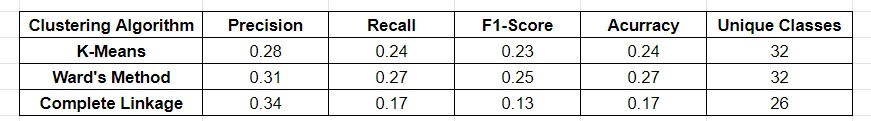

In [468]:
Image(filename = "raw_data_clustering.JPG", width = 700, height = 700)

#### Reduced Data

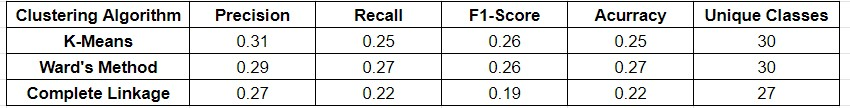

In [469]:
Image(filename = "reduced_data_clustering.JPG", width = 700, height = 700)

When we compare the raw data and reduced data in clustering, unlike classification, reduced data gives better results than raw data. Removing outliers is effective thing to build more representative clusters.

The best clustering algorithm for our problem is Ward's Method. Their clusters represents most of classes and it gives the higher accuracy and f1-score than the other algorithms.

The best precision value is 0.34 from Complete Linkage Algorithm. In this scenario, unique classes are 26, even so precision value is higher than the other algorithms. If we would use a better way to assign classes to clusters Complete Linkage could give a better accuracy result than the others.

In class assignment to clusters, our method stucks when all distinct classes of a cluster assigned to other clusters. Because of that some classes could not represented. If we develop a better method for this scenario, algorithms may give better results for clustering.